## Importing Libraries

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creating path for df
path = r"C:\Users\Artemis07\Downloads\29-08-2023 Instacart Basket Analysis"

In [4]:
#importing df
instacart_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge.pkl'))

In [5]:
instacart_merged.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_joined,num_of_dependants,marital_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity


In [6]:
#Checking columns for PII Data
instacart_merged.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_orders',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'num_of_dependants', 'marital_status', 'income',
       'region', 'activity_flag'],
      dtype='object')

_# PII: data contains first name, last name, gender, what state they are in, their marital status, income, and number of dependents. Allof these items are could potentially be used trace a particular person._

In [7]:
#dropping column 'first_names\' and 'surname' from dataset due to security 
instacart_merged = instacart_merged.drop(['first_name', 'surname'], axis = 1)

In [8]:
instacart_merged.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,marital_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity


In [9]:
instacart_merged.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependants', 'marital_status', 'income', 'region',
       'activity_flag'],
      dtype='object')

# Regional Analysis

__Northeast:__ Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, New Jersey

__Midwest:__ Wisconsin, Michigan, Illinois, Indiana, Ohio, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri

__South:__ Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Mississippi, Alabama, Oklahoma, Texas, Arkansas, Louisiana

__West:__ Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii

### Create region column

In [10]:
# Creating a Region column based on state column 

results_region = []

for value in instacart_merged["state"]: 
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        results_region.append("Northeast")
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        results_region.append("Midwest") 
    elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
        results_region.append("South")
    else: 
        results_region.append("West")


In [11]:
# adding results_region as column 
instacart_merged['region'] = results_region

In [12]:
# Checking new region column for confirmation
instacart_merged.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,marital_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity


### Create a crosstab between region and spending flag

In [13]:
# Checking frequency of region
instacart_merged['region'].value_counts(dropna = False)

region
South        10174012
West          8910786
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [14]:
# Checking frequency of spending flag
instacart_merged['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     32285165
High spender      119694
Name: count, dtype: int64

In [15]:
# Creating regional_spending to determine if there is a differenct between spending habits between U.S. regions
regional_spending = pd.crosstab(instacart_merged['region'], instacart_merged['spending_flag'], dropna = False)

In [16]:
# Checking regional_spending
regional_spending

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,37492,10136520
West,34295,8876491


Text(0, 0.5, 'Spending Frequency')

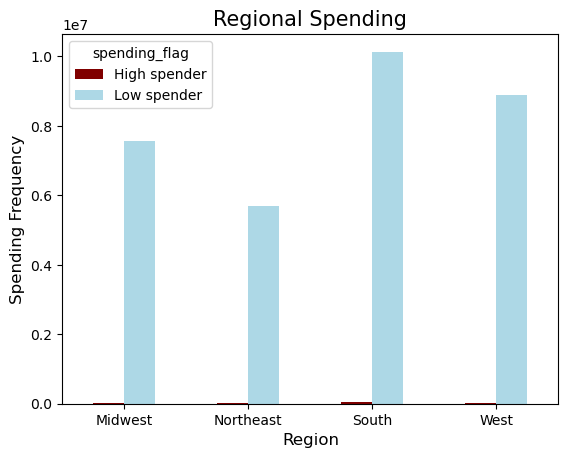

In [17]:
# Creating bar chart of regional_spending 

bar_regional_spending = regional_spending.plot(kind = 'bar', stacked = False, rot = 0, color = ['maroon', 'lightblue' ])
plt.title("Regional Spending", fontsize = 15)
plt.xlabel("Region", fontsize = 12)
plt.ylabel("Spending Frequency", fontsize = 12)


In [18]:
# Exporting Regional Spending bar chart into visualizations folder
bar_regional_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_spending.png'))

# Exclusion for low-activity customers

__Creating an exclusion flag for low activity customers (customers with less than 5 orders)__

In [19]:
#Creating low_activity flag
instacart_merged.loc[instacart_merged['max_order'] < 5, 'activity_flag'] = 'low activity'

In [20]:
#Creating normal_activity flag
instacart_merged.loc[instacart_merged['max_order'] >= 5, 'activity_flag'] = 'normal activity'

In [21]:
#Checking frequency of new activity_flag
instacart_merged['activity_flag'].value_counts(dropna = False)

activity_flag
normal activity    30964564
low activity        1440295
Name: count, dtype: int64

In [22]:
#Exporting instacart_merged with new activity_flag column 
instacart_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge.pkl'))

In [23]:
#Creating a new sample with only normal activity 
instacart_merged_2 = instacart_merged[instacart_merged['activity_flag']=='normal activity']


In [24]:
instacart_merged.shape

(32404859, 34)

In [25]:
instacart_merged_2.shape

(30964564, 34)

In [26]:
#exporting instacart_merged_2 
instacart_merged_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_noact_merge.pkl'))

# Create a profiling variables

__Creating a profiling variable based on age, income, certain goods in the "department_id" column, and number of dependents. You can alse use the "orders_day_of_the_week" and "order_hour_of_day" columns__

In [27]:
#Checking stats for age
instacart_merged['age'].describe()
                 

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

__Creating age groups:__

_Young Adult: 18-32_

_Adult: 33-48_

_Older Adult: 49-64_

_Seniors: 65+_

In [28]:
#Creating age_group flag for Young Adult
instacart_merged.loc[(instacart_merged['age'] >= 18) & (instacart_merged['age'] <= 32), 'age_group'] = 'Young Adult: 18-32'

In [29]:
#Creating age_group flag for Adult
instacart_merged.loc[(instacart_merged['age'] >= 33) & (instacart_merged['age'] <= 48), 'age_group'] = 'Adult: 33-48'

In [30]:
#Creating age_group flage for Older Adult
#Creating age_group flag for Adult
instacart_merged.loc[(instacart_merged['age'] >= 49) & (instacart_merged['age'] <= 64), 'age_group'] = 'Older Adult: 49-64'

In [31]:
#Creating age_group flag for Senior
instacart_merged.loc[(instacart_merged['age'] >= 65), 'age_group'] = 'Senior: 65+'

In [32]:
#Checking frequency of age_group flag
instacart_merged['age_group'].value_counts(dropna = False)

age_group
Senior: 65+           8575084
Adult: 33-48          8116256
Older Adult: 49-64    8087706
Young Adult: 18-32    7625813
Name: count, dtype: int64

In [33]:
#Checking stats for income
instacart_merged['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

__Creating income levels__

_Lower level: 25,000 to 66,000_

_Moderate level: 67,000 to 96,000_

_Middle level: 97,000 to 126,000_

_Upper level: 127,000+_

In [34]:
#Creating income_level flag for Lower level
instacart_merged.loc[(instacart_merged['income'] >= 25000) & (instacart_merged['income'] <= 67000), 'income_level'] = 'Lower Level'

In [35]:
#Creating income_level flag for Middle Level
instacart_merged.loc[(instacart_merged['income'] >= 67001) & (instacart_merged['income'] < 127000), 'income_level'] = 'Middle Level'

In [36]:
#Creating income_level flag for Upper Level
instacart_merged.loc[instacart_merged['income'] > 127001, 'income_level'] = 'Upper Level'

In [37]:
#Checking frequency of income level flag
instacart_merged['income_level'].value_counts(dropna = False)

income_level
Middle Level    16035018
Upper Level      8268878
Lower Level      8100799
NaN                  164
Name: count, dtype: int64

In [38]:
#Creating an age and income crosstab
age_income = pd.crosstab(instacart_merged['income_level'], instacart_merged['age_group'], dropna = False)

In [39]:
age_income

age_group,Adult: 33-48,Older Adult: 49-64,Senior: 65+,Young Adult: 18-32
income_level,,,,
Lower Level,2379170,1089267,1119276,3513086
Middle Level,4076876,3829181,4099537,4029424
Upper Level,1660179,3169258,3356138,83303


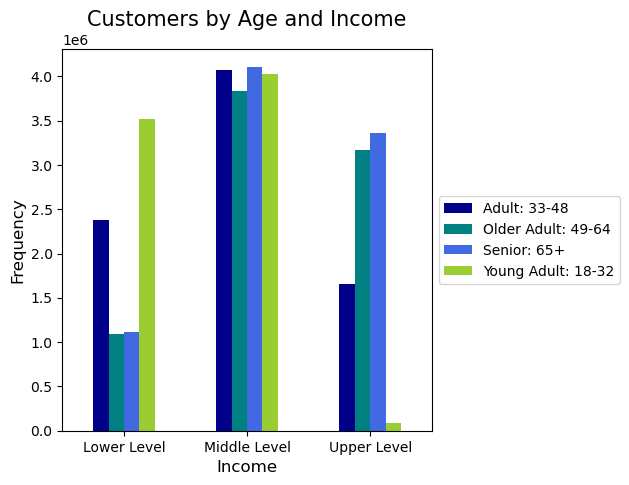

In [40]:
#Creating a bar chart with age_income crosstab

bar_age_income = age_income.plot(kind = 'bar', stacked = False, rot = 0, color = ['darkblue', 'teal', 'royalblue', 'yellowgreen' ])
plt.title("Customers by Age and Income", fontsize = 15)
plt.xlabel("Income", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [41]:
# Exporting Customers by Age and Income bar chart into visualizations folder
bar_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_income.png'))